In [ ]:
import os
import numpy as np
import pandas as pd

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
df = pd.read_csv(r"/content/aa_dataset-tickets-multi-lang-5-2-50-version.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28587 entries, 0 to 28586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   24749 non-null  object
 1   body      28587 non-null  object
 2   answer    28580 non-null  object
 3   type      28587 non-null  object
 4   queue     28587 non-null  object
 5   priority  28587 non-null  object
 6   language  28587 non-null  object
 7   version   28587 non-null  int64 
 8   tag_1     28587 non-null  object
 9   tag_2     28574 non-null  object
 10  tag_3     28451 non-null  object
 11  tag_4     25529 non-null  object
 12  tag_5     14545 non-null  object
 13  tag_6     5874 non-null   object
 14  tag_7     2040 non-null   object
 15  tag_8     565 non-null    object
dtypes: int64(1), object(15)
memory usage: 3.5+ MB


In [ ]:
df.drop("tag_8",axis= 1,inplace = True)

In [ ]:
df

,subject,body,answer,type,queue,priority,language,version,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7
0,Wesentlicher Sicherheitsvorfall,"Sehr geehrtes Support-Team,\n\nich möchte eine...",Vielen Dank für die Meldung des kritischen Sic...,Incident,Technical Support,high,de,51,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN
1,Account Disruption,"Dear Customer Support Team,\n\nI am writing to...","Thank you for reaching out, <name>. We are awa...",Incident,Technical Support,high,en,51,Account,Disruption,Outage,IT,Tech Support,NaN,NaN
2,Query About Smart Home System Integration Feat...,"Dear Customer Support Team,\n\nI hope this mes...",Thank you for your inquiry. Our products suppo...,Request,Returns and Exchanges,medium,en,51,Product,Feature,Tech Support,NaN,NaN,NaN,NaN
3,Inquiry Regarding Invoice Details,"Dear Customer Support Team,\n\nI hope this mes...",We appreciate you reaching out with your billi...,Request,Billing and Payments,low,en,51,Billing,Payment,Account,Documentation,Feedback,NaN,NaN
4,Question About Marketing Agency Software Compa...,"Dear Support Team,\n\nI hope this message reac...",Thank you for your inquiry. Our product suppor...,Problem,Sales and Pre-Sales,medium,en,51,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28582,Performance Problem with Data Analytics Tool,The data analytics tool experiences sluggish p...,We are addressing the performance issue with t...,Incident,Technical Support,high,en,400,Performance,IT,Tech Support,NaN,NaN,NaN,NaN
28583,Datensperrung in der Kundschaftsbetreuung,"Es gab einen Datensperrungsunfall, bei dem ung...",Ich kann Ihnen bei dem Datensperrungsunfall he...,Incident,Product Support,high,de,400,Security,IT,Tech Support,Bug,NaN,NaN,NaN
28584,Problem mit der Videokonferenz-Software heute,Wichtigere Sitzungen wurden unterbrochen durch...,"Sehr geehrte/r [Name], leider wurde das Proble...",Incident,Human Resources,low,de,400,Bug,Performance,Network,IT,Tech Support,NaN,NaN
28585,Update Request for SaaS Platform Integration F...,Requesting an update on the integration featur...,Received your request for updates on the integ...,Change,IT Support,high,en,400,Feature,IT,Tech Support,NaN,NaN,NaN,NaN


In [ ]:
print(df.columns.to_list())

['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language', 'version', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7']


In [ ]:
df.isnull().sum()

,0
subject,3838
body,0
answer,7
type,0
queue,0
priority,0
language,0
version,0
tag_1,0
tag_2,13


In [ ]:
df["type"].value_counts()

,count
type,
Incident,11466
Request,8187
Problem,6012
Change,2922


In [ ]:
df.queue.value_counts()

,count
queue,
Technical Support,8362
Product Support,5252
Customer Service,4268
IT Support,3433
Billing and Payments,2788
Returns and Exchanges,1437
Service Outages and Maintenance,1148
Sales and Pre-Sales,918
Human Resources,576


In [ ]:
df[['tag_1','tag_2','tag_3',"tag_4","tag_5","tag_6","tag_7"]].head()

,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7
0,Security,Outage,Disruption,Data Breach,NaN,NaN,NaN
1,Account,Disruption,Outage,IT,Tech Support,NaN,NaN
2,Product,Feature,Tech Support,NaN,NaN,NaN,NaN
3,Billing,Payment,Account,Documentation,Feedback,NaN,NaN
4,Product,Feature,Feedback,Tech Support,NaN,NaN,NaN


In [ ]:
df.language.value_counts()

,count
language,
en,16338
de,12249


In [ ]:
df = df[df["language"]=="en"]

In [ ]:
df.shape

(16338, 15)

In [ ]:
df[['tag_1','tag_2','tag_3',"tag_4","tag_5","tag_6","tag_7"]] = df[['tag_1','tag_2','tag_3',"tag_4","tag_5","tag_6","tag_7"]].fillna("UNKNOWN")

/tmp/ipython-input-3891905829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['tag_1','tag_2','tag_3',"tag_4","tag_5","tag_6","tag_7"]] = df[['tag_1','tag_2','tag_3',"tag_4","tag_5","tag_6","tag_7"]].fillna("UNKNOWN")


In [ ]:
 df['subject'].fillna("").value_counts().sum()

np.int64(16338)

In [ ]:
df["body"].value_counts().sum()

np.int64(16338)

In [ ]:
df["text"] = df["subject"].fillna("") + " " + df["body"].fillna("")

/tmp/ipython-input-1746923093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["subject"].fillna("") + " " + df["body"].fillna("")


In [ ]:
df.isnull().sum()

,0
subject,2607
body,0
answer,3
type,0
queue,0
priority,0
language,0
version,0
tag_1,0
tag_2,0


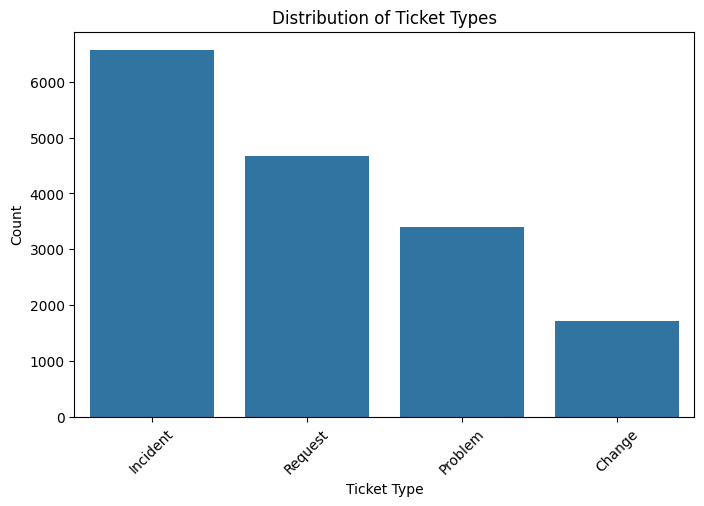

,count
type,
Incident,6571
Request,4665
Problem,3397
Change,1705


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="type", order=df["type"].value_counts().index)
plt.title("Distribution of Ticket Types")
plt.xlabel("Ticket Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

df["type"].value_counts()

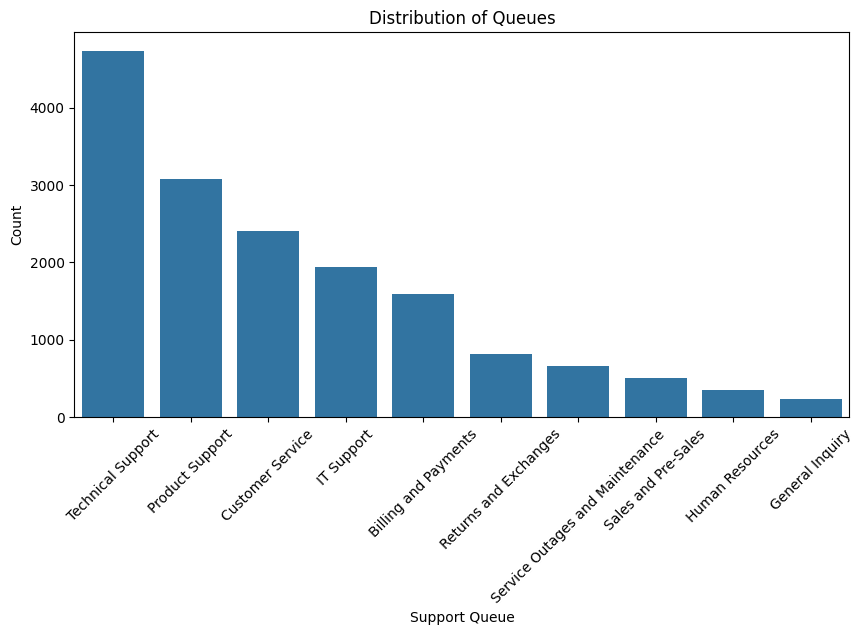

,count
queue,
Technical Support,4737
Product Support,3073
Customer Service,2410
IT Support,1942
Billing and Payments,1595
Returns and Exchanges,820
Service Outages and Maintenance,664
Sales and Pre-Sales,513
Human Resources,348


In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="queue", order=df["queue"].value_counts().index)
plt.title("Distribution of Queues")
plt.xlabel("Support Queue")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

df["queue"].value_counts()


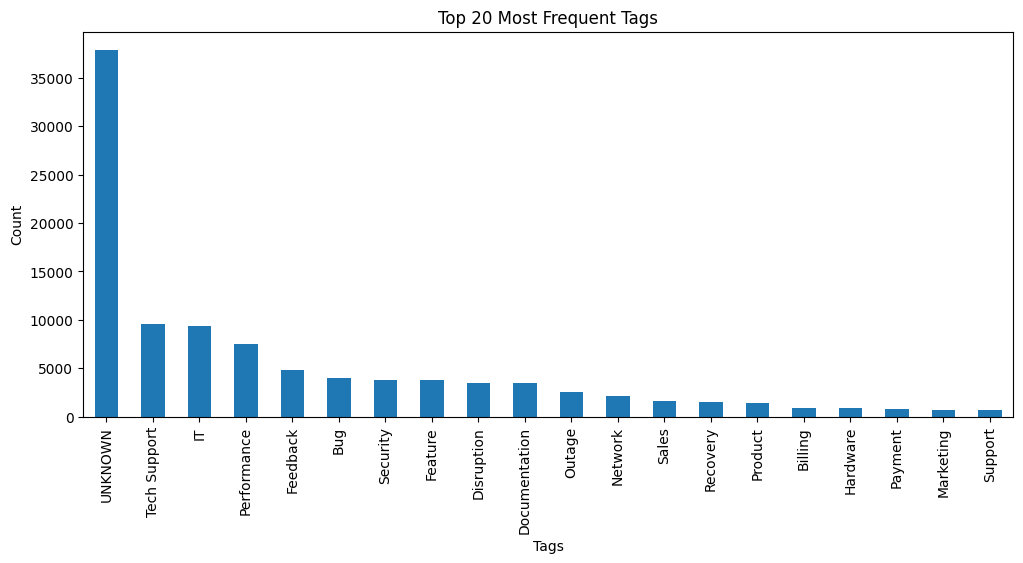

In [ ]:
tag_columns = ['tag_1','tag_2','tag_3','tag_4','tag_5','tag_6','tag_7']

# Combine all tag columns into one series
all_tags = df[tag_columns].astype(str).values.flatten()

tag_series = pd.Series(all_tags)
tag_series = tag_series[tag_series != "nan"]  # remove NaN strings

plt.figure(figsize=(12,5))
tag_series.value_counts().head(20).plot(kind='bar')
plt.title("Top 20 Most Frequent Tags")
plt.xlabel("Tags")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-501453946.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_length"] = df["body"].apply(lambda x: len(str(x).split()))


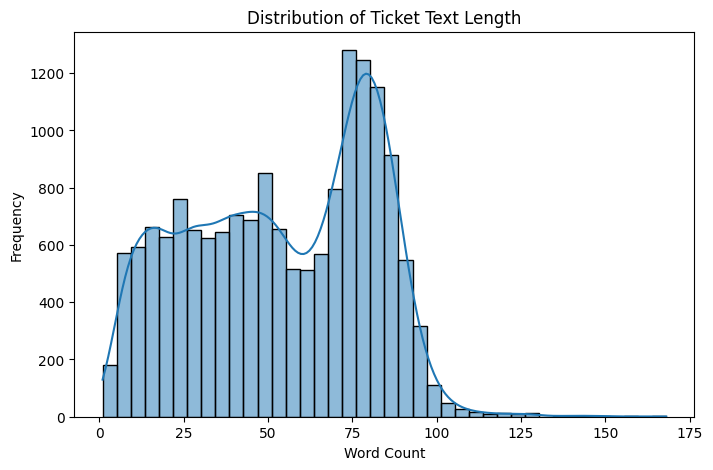

In [ ]:
df["text_length"] = df["body"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8,5))
sns.histplot(df["text_length"], kde=True, bins=40)
plt.title("Distribution of Ticket Text Length")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

## Clean special characters, HTML tags, and extra symbols, and lowercasing Tokenization, stopword removal.

In [ ]:
import re
import pandas as pd
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from unidecode import unidecode

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_english = set(stopwords.words('english'))

def clean_text(t):
    if pd.isna(t):
        return ''

    # Convert accented characters (é → e)
    # t = unidecode(str(t))
    # ✅ Convert to lowercase for NLP
    t = t.lower()

    tokens = word_tokenize(t)
    # tokenize ['This', 'is', 'an', 'example',
    # 'sentence', ',', 'demonstrating', 'word', 'tokenization', 'with', 'NLTK', '!']
    tokens = [i for i in tokens if (i not in stop_english) and len(i) > 2]  # remove stopwords + short words
    t = ' '.join(tokens)

    # Remove HTML tags
    t = re.sub(r'<.*?>', ' ', t)

    t = re.sub(r'\\n', ' ', t)
    # Remove URLs
    t = re.sub(r'http\S+|www\.\S+', ' ', t)

    # Remove email addresses
    t = re.sub(r'\S+@\S+', ' ', t)

    # 🔥 Remove all special characters, punctuation, underscores, hyphens, and escape sequences
    t = re.sub(r'[%\[\]_\\<\(\]#\?\'\":\)\-\;\+\!\/,>\.\n\r]', ' ', t)

    # Remove multiple spaces and trim
    t = re.sub(r'\s+', ' ', t).strip()

    return t

# Apply to DataFrame
df['cleaned_text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/tmp/ipython-input-1875592738.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_text'] = df['text'].apply(clean_text)


In [ ]:
df.loc[1,"cleaned_text"]

'account disruption dear customer support team i writing report significant problem centralized account management portal currently appears offline outage blocking access account settings leading substantial inconvenience attempted log multiple times using different browsers devices issue persists could please provide update outage status estimated time resolution also alternative ways access manage account downtime'

## Encode targets:
+ type, queue: LabelEncoder + One-hot encoding.
+ tags: MultiLabelBinarizer.

In [ ]:
# Optional: Encode 'priority' and 'language' for future model enhancements
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MultiLabelBinarizer
from tensorflow.keras.utils import to_categorical

le_priority = LabelEncoder()
le_language = LabelEncoder()

df['priority_encoded'] = le_priority.fit_transform(df['priority'])
df['language_encoded'] = le_language.fit_transform(df['language'])


# Encode 'type' and 'queue'
le_type = LabelEncoder()
le_queue = LabelEncoder()

df['type_encoded'] = le_type.fit_transform(df['type'])
df['queue_encoded'] = le_queue.fit_transform(df['queue'])

ohe = OneHotEncoder(sparse_output=False)
type_ohe = ohe.fit_transform(df[['type_encoded']])
queue_ohe = ohe.fit_transform(df[['queue_encoded']])


# --- Prepare targets ---
# Type (categorical)
y_type_int = df["type_encoded"].values
y_type = to_categorical(y_type_int)


# Queue (categorical)
y_queue_int = df["queue_encoded"].values
y_queue = to_categorical(y_queue_int)

# Tags (multi-label)
tags_cols = ['tag_1','tag_2','tag_3','tag_4','tag_5','tag_6','tag_7']
df['tags_combined'] = df[tags_cols].astype(str).values.tolist()
# clean tags: remove 'nan', 'None', 'Unknown' variations if present
def clean_tags_list(lst):
    out = []
    for t in lst:
        if t is None:
            continue
        ts = str(t).strip()
        if ts.lower() in ['', 'nan', 'none', 'unknown', 'nan.0']:
            continue
        out.append(ts)
    return out

df['tags_combined'] = df['tags_combined'].apply(clean_tags_list)
mlb = MultiLabelBinarizer()
y_tags = mlb.fit_transform(df['tags_combined'])


/tmp/ipython-input-289365109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['priority_encoded'] = le_priority.fit_transform(df['priority'])
/tmp/ipython-input-289365109.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language_encoded'] = le_language.fit_transform(df['language'])
/tmp/ipython-input-289365109.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [ ]:
type_ohe

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

## Text features extracted using Word2Vec embeddings.

In [ ]:
pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 57.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_NUM_WORDS = 20000
MAX_SEQ_LEN = 200
EMBEDDING_DIM = 300
# LSTM_UNITS = 128
# DROPOUT_RATE = 0.3
# BATCH_SIZE = 64
# EPOCHS = 10


texts = df['cleaned_text'].tolist()
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
max_len = max(len(seq) for seq in sequences)

X = pad_sequences(sequences, maxlen=len(max(sequences,key = len)), padding='pre', truncating='pre')
X = np.array(X, dtype="int32")
# Tokenize text for Word2Vec
sentence = [text.split() for text in df['cleaned_text']]

# Train Word2Vec model
w2v_model = Word2Vec(sentence, vector_size=300, window=5, min_count=2, workers=4)

embedding_matrix = np.zeros((num_words, 300))
for word, i in word_index.items():
    if i >= num_words:
        continue
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
    # else:
    #     # small random init for OOV within vocab range
    #     embedding_matrix[i] = np.random.normal(scale=0.01, size=(300,))



In [ ]:
import pickle
with open('/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

In [ ]:
len(max(sequences,key = len))

In [ ]:
import pickle

with open("/le_type.pkl", "wb") as f:
    pickle.dump(le_type, f)

with open("/le_queue.pkl", "wb") as f:
    pickle.dump(le_queue, f)

with open("/mlb.pkl", "wb") as f:
    pickle.dump(mlb, f)


In [ ]:
print(f"TensorFlow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")

NameError: name 'tf' is not defined

In [ ]:
df.columns

Index(['subject', 'body', 'answer', 'type', 'queue', 'priority', 'language',
       'version', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6',
       'tag_7', 'text', 'text_length', 'cleaned_text', 'priority_encoded',
       'language_encoded', 'type_encoded', 'queue_encoded', 'tags_combined'],
      dtype='object')

In [ ]:
len(y_tags[0])

862

In [ ]:
y_type

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [ ]:
y_tags

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df['tags_combined']

,tags_combined
1,"[Account, Disruption, Outage, IT, Tech Support]"
2,"[Product, Feature, Tech Support]"
3,"[Billing, Payment, Account, Documentation, Fee..."
4,"[Product, Feature, Feedback, Tech Support]"
5,"[Feature, Product, Documentation, Feedback]"
...,...
28578,"[Billing, Payment, Performance, Bug]"
28580,"[Security, Incident, Bug, Performance]"
28582,"[Performance, IT, Tech Support]"
28585,"[Feature, IT, Tech Support]"


## Sprint 3 : Model Selection & Training, Model Evaluation
+ Approaches Used
  - Deep learning architectures:
  - RNN, LSTM, GRU (for sequence modeling).

In [ ]:
import os
import keras
import sklearn
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer

from tensorflow.keras.layers import Input,InputLayer, Embedding, Bidirectional, LSTM, GRU, Dense, Dropout,concatenate,Concatenate
from tensorflow.keras.models import Model,Sequential

#### --- Train-test split ---

In [ ]:
X_train, X_test, y_type_train, y_type_test, y_queue_train, y_queue_test, y_tags_train, y_tags_test = train_test_split(
    X, y_type, y_queue, y_tags, test_size=0.2, shuffle=True
)

### model

In [ ]:
# --- Input layer ---
input_seq = Input(shape=(len(max(sequences, key=len)),), name='input_seq')

# --- Embedding layer ---
embedding = Embedding(
    input_dim=num_words,
    output_dim=300,
    weights=[embedding_matrix],
    input_length=len(max(sequences, key=len)),
    trainable=False,
    name='w2v_embedding'
)(input_seq)

# --- Shared BiLSTM encoder ---
x = Bidirectional(LSTM(128, return_sequences=False, name='encoder_lstm'))(embedding)
x = Dropout(0.25)(x)

# --- Type head ---
type_branch = Dense(64, activation='relu')(x)
type_out = Dense(y_type.shape[1], activation='softmax', name='type_out')(type_branch)

# --- Queue head ---
queue_input = Concatenate(name='queue_concat')([x, type_out])
queue_branch = Dense(64, activation='relu')(queue_input)
queue_out = Dense(y_queue.shape[1], activation='softmax', name='queue_out')(queue_branch)

# --- Tags head ---
tags_input = Concatenate(name='tags_concat')([x, queue_out])
tags_branch = Dense(64, activation='relu')(tags_input)
tags_out = Dense(y_tags.shape[1], activation='sigmoid', name='tags_out')(tags_branch)

# --- Build multi-output model ---
model = Model(inputs=input_seq, outputs=[type_out, queue_out, tags_out])

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 29.5 MB/s eta 0:00:00


In [ ]:
import optuna
from optuna.samplers import GridSampler

In [ ]:
def objective(trial):
    nu = trial.suggest_categorical("nurons",[32,64,128,256])
    # --- Input layer ---
    input_seq = Input(shape=(len(max(sequences, key=len)),), name='input_seq')

    # --- Embedding layer ---
    embedding = Embedding(
        input_dim=num_words,
        output_dim=300,
        weights=[embedding_matrix],
        input_length=len(max(sequences, key=len)),
        trainable=False,
        name='w2v_embedding'
    )(input_seq)

    # --- Shared BiLSTM encoder ---
    # x = Bidirectional(LSTM(nu, return_sequences=False, name='encoder_lstm'))(embedding)
    x = Bidirectional(LSTM(nu, return_sequences=False, name='encoder_gru'))(embedding)
    x = Dropout(0.25)(x)

    # --- Type head ---
    type_branch = Dense(nu, activation='relu')(x)
    type_out = Dense(y_type.shape[1], activation='softmax', name='type_out')(type_branch)

    # --- Queue head ---
    queue_input = Concatenate(name='queue_concat')([x, type_out])
    queue_branch = Dense(nu, activation='relu')(queue_input)
    queue_out = Dense(y_queue.shape[1], activation='softmax', name='queue_out')(queue_branch)

    # --- Tags head ---
    tags_input = Concatenate(name='tags_concat')([x, queue_out])
    tags_branch = Dense(nu, activation='relu')(tags_input)
    tags_out = Dense(y_tags.shape[1], activation='sigmoid', name='tags_out')(tags_branch)

    # --- Build multi-output model ---
    model = Model(inputs=input_seq, outputs=[type_out, queue_out, tags_out])

    # compile
    model.compile(
        optimizer= 'adam',#tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss={
            'type_out': 'categorical_crossentropy',
            'queue_out': 'categorical_crossentropy',
            'tags_out': 'binary_crossentropy'
        },
       # loss_weights={'type_out': 1.0, 'queue_out': 1.0, 'tags_out': 1.0},
        metrics=  {
            'type_out': ['accuracy'],
            'queue_out': ['accuracy'],
            'tags_out': ['accuracy']# [tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
        }
    )

    history = model.fit(
    X_train,
    {'type_out': y_type_train, 'queue_out': y_queue_train, 'tags_out': y_tags_train},
    validation_split=0.12,
    epochs=10,
    batch_size=64
    )
    return history.history["val_loss"][-1]

In [ ]:
sample = {"nurons":[32,64,128,256]}
study = optuna.create_study(direction="minimize",sampler=GridSampler(search_space= sample))
study.optimize(objective,)

[I 2025-11-19 15:46:07,511] A new study created in memory with name: no-name-31380b2f-989e-442b-9f59-de60b6f14d51


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - loss: 2.9954 - queue_out_accuracy: 0.2740 - queue_out_loss: 1.9980 - tags_out_accuracy: 0.0309 - tags_out_loss: 0.2110 - type_out_accuracy: 0.6557 - type_out_loss: 0.7865 - val_loss: 2.2210 - val_queue_out_accuracy: 0.3581 - val_queue_out_loss: 1.7781 - val_tags_out_accuracy: 0.1002 - val_tags_out_loss: 0.0142 - val_type_out_accuracy: 0.7732 - val_type_out_loss: 0.4458
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 2.1529 - queue_out_accuracy: 0.3808 - queue_out_loss: 1.7104 - tags_out_accuracy: 0.0807 - tags_out_loss: 0.0139 - type_out_accuracy: 0.7829 - type_out_loss: 0.4286 - val_loss: 2.0901 - val_queue_out_accuracy: 0.3821 - val_queue_out_loss: 1.6921 - val_tags_out_accuracy: 0.2196 - val_tags_out_loss: 0.0135 - val_type_out_accuracy: 0.8032 - val_type_out_loss: 0.4090
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 2.0422 - queue_out_accuracy: 0.3964 - queue_out_loss: 1.6375 - tags_out_accuracy: 0.1

[I 2025-11-19 15:46:53,640] Trial 0 finished with value: 1.8665190935134888 and parameters: {'nurons': 128}. Best is trial 0 with value: 1.8665190935134888.


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 2.8439 - queue_out_accuracy: 0.2846 - queue_out_loss: 1.9631 - tags_out_accuracy: 0.0501 - tags_out_loss: 0.1619 - type_out_accuracy: 0.6702 - type_out_loss: 0.7189 - val_loss: 2.1576 - val_queue_out_accuracy: 0.3713 - val_queue_out_loss: 1.7393 - val_tags_out_accuracy: 0.0540 - val_tags_out_loss: 0.0133 - val_type_out_accuracy: 0.7918 - val_type_out_loss: 0.4317
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 2.0728 - queue_out_accuracy: 0.3951 - queue_out_loss: 1.6569 - tags_out_accuracy: 0.1261 - tags_out_loss: 0.0130 - type_out_accuracy: 0.7960 - type_out_loss: 0.4029 - val_loss: 2.0778 - val_queue_out_accuracy: 0.4079 - val_queue_out_loss: 1.6429 - val_tags_out_accuracy: 0.1506 - val_tags_out_loss: 0.0121 - val_type_out_accuracy: 0.7445 - val_type_out_loss: 0.4411
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - loss: 1.9713 - queue_out_accuracy: 0.4147 - queue_out_loss: 1.5790 - tags_out_accuracy: 0.

[I 2025-11-19 15:47:59,390] Trial 1 finished with value: 1.8386377096176147 and parameters: {'nurons': 256}. Best is trial 1 with value: 1.8386377096176147.


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - loss: 3.2333 - queue_out_accuracy: 0.2576 - queue_out_loss: 2.0326 - tags_out_accuracy: 0.0251 - tags_out_loss: 0.2775 - type_out_accuracy: 0.5962 - type_out_loss: 0.9232 - val_loss: 2.3553 - val_queue_out_accuracy: 0.3341 - val_queue_out_loss: 1.8729 - val_tags_out_accuracy: 0.0306 - val_tags_out_loss: 0.0145 - val_type_out_accuracy: 0.7684 - val_type_out_loss: 0.4815
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 2.2511 - queue_out_accuracy: 0.3546 - queue_out_loss: 1.7881 - tags_out_accuracy: 0.0581 - tags_out_loss: 0.0148 - type_out_accuracy: 0.7724 - type_out_loss: 0.4481 - val_loss: 2.1482 - val_queue_out_accuracy: 0.3623 - val_queue_out_loss: 1.7205 - val_tags_out_accuracy: 0.1116 - val_tags_out_loss: 0.0139 - val_type_out_accuracy: 0.7780 - val_type_out_loss: 0.4314
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 2.0875 - queue_out_accuracy: 0.3870 - queue_out_loss: 1.6730 - tags_out_accuracy: 0.0

[I 2025-11-19 15:48:44,674] Trial 2 finished with value: 1.9657068252563477 and parameters: {'nurons': 64}. Best is trial 1 with value: 1.8386377096176147.


Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - loss: 3.4131 - queue_out_accuracy: 0.2838 - queue_out_loss: 2.0334 - tags_out_accuracy: 0.0111 - tags_out_loss: 0.3725 - type_out_accuracy: 0.5734 - type_out_loss: 1.0071 - val_loss: 2.5152 - val_queue_out_accuracy: 0.2933 - val_queue_out_loss: 1.9332 - val_tags_out_accuracy: 0.0468 - val_tags_out_loss: 0.0150 - val_type_out_accuracy: 0.7415 - val_type_out_loss: 0.5723
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 2.4219 - queue_out_accuracy: 0.3146 - queue_out_loss: 1.8883 - tags_out_accuracy: 0.0393 - tags_out_loss: 0.0157 - type_out_accuracy: 0.7598 - type_out_loss: 0.5179 - val_loss: 2.2901 - val_queue_out_accuracy: 0.3593 - val_queue_out_loss: 1.8029 - val_tags_out_accuracy: 0.0462 - val_tags_out_loss: 0.0145 - val_type_out_accuracy: 0.7690 - val_type_out_loss: 0.4808
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 2.2311 - queue_out_accuracy: 0.3620 - queue_out_loss: 1.7638 - tags_out_accuracy: 0.0

[I 2025-11-19 15:49:29,423] Trial 3 finished with value: 2.039379358291626 and parameters: {'nurons': 32}. Best is trial 1 with value: 1.8386377096176147.


In [ ]:
study.best_params

{'nurons': 256}

In [ ]:
study.best_trial

FrozenTrial(number=1, state=<TrialState.COMPLETE: 1>, values=[1.8386377096176147], datetime_start=datetime.datetime(2025, 11, 19, 15, 46, 53, 641426), datetime_complete=datetime.datetime(2025, 11, 19, 15, 47, 59, 390036), params={'nurons': 256}, user_attrs={}, system_attrs={'search_space': {'nurons': [32, 64, 128, 256]}, 'grid_id': 1}, intermediate_values={}, distributions={'nurons': CategoricalDistribution(choices=(32, 64, 128, 256))}, trial_id=1, value=None)

In [ ]:
study.best_value

1.8386377096176147

In [ ]:
study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_nurons,system_attrs_grid_id,system_attrs_search_space,state
0,0,1.866519,2025-11-19 15:46:07.512779,2025-11-19 15:46:53.640373,0 days 00:00:46.127594,128,0,"{'nurons': [32, 64, 128, 256]}",COMPLETE
1,1,1.838638,2025-11-19 15:46:53.641426,2025-11-19 15:47:59.390036,0 days 00:01:05.748610,256,1,"{'nurons': [32, 64, 128, 256]}",COMPLETE
2,2,1.965707,2025-11-19 15:47:59.391152,2025-11-19 15:48:44.674247,0 days 00:00:45.283095,64,2,"{'nurons': [32, 64, 128, 256]}",COMPLETE
3,3,2.039379,2025-11-19 15:48:44.675330,2025-11-19 15:49:29.423710,0 days 00:00:44.748380,32,3,"{'nurons': [32, 64, 128, 256]}",COMPLETE


In [ ]:

# --- Input layer ---
input_seq = Input(shape=(len(max(sequences, key=len)),), name='input_seq')

# --- Embedding layer ---
embedding = Embedding(
    input_dim=num_words,
    output_dim=300,
    weights=[embedding_matrix],
    input_length=len(max(sequences, key=len)),
    trainable=False,
    name='w2v_embedding'
)(input_seq)

# --- Shared BiLSTM encoder ---
# x = Bidirectional(LSTM(nu, return_sequences=False, name='encoder_lstm'))(embedding)
x = Bidirectional(LSTM(256, return_sequences=False, name='encoder_gru'))(embedding)
x = Dropout(0.25)(x)

# --- Type head ---
type_branch = Dense(256, activation='relu')(x)
type_out = Dense(y_type.shape[1], activation='softmax', name='type_out')(type_branch)

# --- Queue head ---
queue_input = Concatenate(name='queue_concat')([x, type_out])
queue_branch = Dense(256, activation='relu')(queue_input)
queue_out = Dense(y_queue.shape[1], activation='softmax', name='queue_out')(queue_branch)

# --- Tags head ---
tags_input = Concatenate(name='tags_concat')([x, queue_out])
tags_branch = Dense(256, activation='relu')(tags_input)
tags_out = Dense(y_tags.shape[1], activation='sigmoid', name='tags_out')(tags_branch)

# --- Build multi-output model ---
model = Model(inputs=input_seq, outputs=[type_out, queue_out, tags_out])

# compile
model.compile(
    optimizer= 'adam',#tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss={
        'type_out': 'categorical_crossentropy',
        'queue_out': 'categorical_crossentropy',
        'tags_out': 'binary_crossentropy'
    },
  # loss_weights={'type_out': 1.0, 'queue_out': 1.0, 'tags_out': 1.0},
    metrics=  {
        'type_out': ['accuracy'],
        'queue_out': ['accuracy'],
        'tags_out': ['accuracy']# [tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall')]
    }
)

history = model.fit(
X_train,
{'type_out': y_type_train, 'queue_out': y_queue_train, 'tags_out': y_tags_train},
validation_split=0.12,
epochs=70,
batch_size=64
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/70
180/180 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - loss: 2.7364 - queue_out_accuracy: 0.3023 - queue_out_loss: 1.9293 - tags_out_accuracy: 0.0501 - tags_out_loss: 0.1726 - type_out_accuracy: 0.7132 - type_out_loss: 0.6345 - val_loss: 2.1477 - val_queue_out_accuracy: 0.3779 - val_queue_out_loss: 1.7129 - val_tags_out_accuracy: 0.1001 - val_tags_out_loss: 0.0130 - val_type_out_accuracy: 0.7884 - val_type_out_loss: 0.4251
Epoch 2/70
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 2.0989 - queue_out_accuracy: 0.3845 - queue_out_loss: 1.6668 - tags_out_accuracy: 0.1175 - tags_out_loss: 0.0132 - type_out_accuracy: 0.7806 - type_out_loss: 0.4190 - val_loss: 2.0771 - val_queue_out_accuracy: 0.3881 - val_queue_out_loss: 1.6675 - val_tags_out_accuracy: 0.1785 - val_tags_out_loss: 0.0120 - val_type_out_accuracy: 0.8043 - val_type_out_loss: 0.3990
Epoch 3/70
180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 2.0229 - queue_out_accuracy: 0.3970 - queue_out_loss: 1.6167 - tags_out_accuracy: 0.

In [ ]:
model.save("/model.h5")

In [ ]:
import pickle

In [ ]:
y_tags.shape[1]

NameError: name 'y_tags' is not defined

In [ ]:
y_type.shape[1],y_queue.shape[1],y_tags.shape[1]

(4, 10, 1211)

In [ ]:
# --- Evaluate on test set ---
eval_results = model.evaluate(
    X_test,
    {'type_out': y_type_test, 'queue_out': y_queue_test, 'tags_out': y_tags_test},
    batch_size=64,
    # verbose=1
)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 3.6992 - queue_out_accuracy: 0.6070 - queue_out_loss: 2.9101 - tags_out_accuracy: 0.1588 - tags_out_loss: 0.0105 - type_out_accuracy: 0.8814 - type_out_loss: 0.7769


In [ ]:
eval_results

[3.4796223640441895,
 0.7053695917129517,
 2.8043127059936523,
 0.010691849514842033,
 0.607711136341095,
 0.17656058073043823,
 0.8843329548835754]

In [ ]:
# --- Example predictions (probabilities) ---
preds = model.predict(X_test, batch_size=64)
pred_type_probs, pred_queue_probs, pred_tags_probs = preds

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [ ]:
# Convert probs to labels
pred_type_labels = le_type.inverse_transform(np.argmax(pred_type_probs, axis=1))
pred_queue_labels = le_queue.inverse_transform(np.argmax(pred_queue_probs, axis=1))
pred_tags_binary = (pred_tags_probs >= 0.5).astype(int)
pred_tags_lists = mlb.inverse_transform(pred_tags_binary)

In [ ]:
le_type.inverse_transform(np.argmax(pred_type_probs, axis=1))

array(['Problem', 'Problem', 'Incident', ..., 'Problem', 'Incident',
       'Request'], dtype=object)

In [ ]:
pred_tags_lists

[('Disruption', 'Maintenance', 'Outage', 'Performance', 'Recovery'),
 ('Bug', 'IT', 'Performance', 'Tech Support'),
 ('Performance', 'Tech Support'),
 ('Documentation', 'IT', 'Security', 'Tech Support'),
 ('Documentation', 'Feature', 'Feedback', 'IT', 'Tech Support'),
 ('Disruption', 'Network', 'Outage', 'Performance', 'Recovery'),
 ('Documentation', 'Feature'),
 ('Performance',),
 ('Feedback', 'IT', 'Tech Support'),
 ('Feedback', 'Sales'),
 ('Feature', 'Feedback', 'IT', 'Tech Support'),
 ('Crash', 'IT', 'Network', 'Performance', 'Tech Support'),
 ('IT', 'Security'),
 ('Bug', 'IT', 'Performance', 'Tech Support'),
 ('Disruption', 'IT', 'Outage', 'Performance', 'Recovery', 'Tech Support'),
 ('Bug', 'Documentation', 'IT', 'Performance', 'Tech Support'),
 ('Data Breach', 'IT', 'Incident', 'Security', 'Tech Support', 'Virus'),
 ('Documentation', 'Feature', 'IT', 'Integration', 'Tech Support', 'Workflow'),
 ('Bug', 'Performance', 'Tech Support'),
 ('Bug', 'Performance'),
 ('Feature', 'Perfor

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Re-run prediction on the full test set to ensure correct shapes for evaluation
preds = model.predict(X_test, batch_size=64)
pred_type_probs, pred_queue_probs, pred_tags_probs = preds

# Convert tag probabilities to binary labels for evaluation
pred_tags_binary = (pred_tags_probs >= 0.5).astype(int)

# --- Evaluation for 'type' ----
print("\n--- Evaluating 'type' predictions ---")
y_true_type = np.argmax(y_type_test, axis=1)
pred_type_labels_numeric = np.argmax(pred_type_probs, axis=1)

print(f"Type Accuracy: {accuracy_score(y_true_type, pred_type_labels_numeric):.4f}")
print("Type Classification Report:")
print(classification_report(y_true_type, pred_type_labels_numeric, target_names=le_type.classes_))
print("Type Confusion Matrix:\n", confusion_matrix(y_true_type, pred_type_labels_numeric))

# --- Evaluation for 'queue' ---
print("\n--- Evaluating 'queue' predictions ---")
y_true_queue = np.argmax(y_queue_test, axis=1)
pred_queue_labels_numeric = np.argmax(pred_queue_probs, axis=1)

print(f"Queue Accuracy: {accuracy_score(y_true_queue, pred_queue_labels_numeric):.4f}")
print("Queue Classification Report:")
print(classification_report(y_true_queue, pred_queue_labels_numeric, target_names=le_queue.classes_))
print("Queue Confusion Matrix:\n", confusion_matrix(y_true_queue, pred_queue_labels_numeric))

# --- Evaluation for 'tags' ---
print("\n--- Evaluating 'tags' predictions ---")
# For multi-label, accuracy_score is exact match accuracy
print(f"Tags Exact Match Accuracy: {accuracy_score(y_tags_test, pred_tags_binary):.4f}")
print(f"Tags Precision (weighted): {precision_score(y_tags_test, pred_tags_binary, average='weighted', zero_division=0):.4f}")
print(f"Tags Recall (weighted): {recall_score(y_tags_test, pred_tags_binary, average='weighted', zero_division=0):.4f}")
print(f"Tags F1-score (weighted): {f1_score(y_tags_test, pred_tags_binary, average='weighted', zero_division=0):.4f}")

# Classification report for multi-label can be complex, often per-label or with specific averages.
# We'll provide a general report with weighted averages.
print("Tags Classification Report (weighted averages):")
print(classification_report(y_tags_test, pred_tags_binary, target_names=mlb.classes_, zero_division=0))

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step

--- Evaluating 'type' predictions ---
Type Accuracy: 0.8862
Type Classification Report:
              precision    recall  f1-score   support

      Change       0.97      0.98      0.97       379
    Incident       0.84      0.90      0.87      1280
     Problem       0.77      0.67      0.72       665
     Request       0.99      0.99      0.99       944

    accuracy                           0.89      3268
   macro avg       0.89      0.88      0.89      3268
weighted avg       0.88      0.89      0.88      3268

Type Confusion Matrix:
 [[ 372    1    2    4]
 [   2 1146  131    1]
 [   1  217  445    2]
 [  10    0    1  933]]

--- Evaluating 'queue' predictions ---
Queue Accuracy: 0.6346
Queue Classification Report:
                                 precision    recall  f1-score   support

           Billing and Payments       0.78      0.80      0.79       327
               Customer Service       0.53      0.63      0.58       479
       

In [ ]:
# Re-run prediction on the full test set to ensure correct shapes for evaluation
preds = model.predict(X_test, batch_size=64)
pred_type_probs, pred_queue_probs, pred_tags_probs = preds

# Convert tag probabilities to binary labels for evaluation
pred_tags_binary = (pred_tags_probs >= 0.5).astype(int)


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [ ]:
# --- Evaluation for 'type' ----
print("\n--- Evaluating 'type' predictions ---")
y_true_type = np.argmax(y_type_test, axis=1)
pred_type_labels_numeric = np.argmax(pred_type_probs, axis=1)

print(f"Type Accuracy: {accuracy_score(y_true_type, pred_type_labels_numeric):.4f}")
print("Type Classification Report:")
print(classification_report(y_true_type, pred_type_labels_numeric, target_names=le_type.classes_))
print("Type Confusion Matrix:\n")
confusion_matrix(y_true_type, pred_type_labels_numeric)


--- Evaluating 'type' predictions ---
Type Accuracy: 0.8853
Type Classification Report:
              precision    recall  f1-score   support

      Change       0.98      0.98      0.98       328
    Incident       0.86      0.87      0.87      1340
     Problem       0.74      0.72      0.73       667
     Request       0.99      0.99      0.99       933

    accuracy                           0.89      3268
   macro avg       0.89      0.89      0.89      3268
weighted avg       0.88      0.89      0.88      3268

Type Confusion Matrix:



array([[ 322,    0,    0,    6],
       [   1, 1165,  173,    1],
       [   0,  182,  482,    3],
       [   6,    3,    0,  924]])

In [ ]:
# --- Evaluation for 'queue' ---
print("\n--- Evaluating 'queue' predictions ---")
y_true_queue = np.argmax(y_queue_test, axis=1)
pred_queue_labels_numeric = np.argmax(pred_queue_probs, axis=1)

print(f"Queue Accuracy: {accuracy_score(y_true_queue, pred_queue_labels_numeric):.4f}")
print("Queue Classification Report:")
print(classification_report(y_true_queue, pred_queue_labels_numeric, target_names=le_queue.classes_))
print("Queue Confusion Matrix:\n", confusion_matrix(y_true_queue, pred_queue_labels_numeric))


--- Evaluating 'queue' predictions ---
Queue Accuracy: 0.6270
Queue Classification Report:
                                 precision    recall  f1-score   support

           Billing and Payments       0.90      0.76      0.82       305
               Customer Service       0.60      0.57      0.58       492
                General Inquiry       0.66      0.45      0.53        47
                Human Resources       0.55      0.40      0.46        72
                     IT Support       0.56      0.54      0.55       391
                Product Support       0.55      0.64      0.59       594
          Returns and Exchanges       0.59      0.46      0.51       173
            Sales and Pre-Sales       0.50      0.47      0.48       100
Service Outages and Maintenance       0.77      0.75      0.76       118
              Technical Support       0.65      0.70      0.67       976

                       accuracy                           0.63      3268
                      macro av

In [ ]:
# --- Evaluation for 'tags' ---
print("\n--- Evaluating 'tags' predictions ---")
# For multi-label, accuracy_score is exact match accuracy
print(f"Tags Exact Match Accuracy: {accuracy_score(y_tags_test, pred_tags_binary):.4f}")
print(f"Tags Precision (weighted): {precision_score(y_tags_test, pred_tags_binary, average='weighted', zero_division=0):.4f}")
print(f"Tags Recall (weighted): {recall_score(y_tags_test, pred_tags_binary, average='weighted', zero_division=0):.4f}")
print(f"Tags F1-score (weighted): {f1_score(y_tags_test, pred_tags_binary, average='weighted', zero_division=0):.4f}")

# Classification report for multi-label can be complex, often per-label or with specific averages.
# We'll provide a general report with weighted averages.
print("Tags Classification Report (weighted averages):")
print(classification_report(y_tags_test, pred_tags_binary, target_names=mlb.classes_, zero_division=0))


--- Evaluating 'tags' predictions ---
Tags Exact Match Accuracy: 0.0942
Tags Precision (weighted): 0.6562
Tags Recall (weighted): 0.6042
Tags F1-score (weighted): 0.6156
Tags Classification Report (weighted averages):
                                                                                 precision    recall  f1-score   support

                                                                             AI       0.00      0.00      0.00         0
                                                                            API       0.20      0.07      0.11        14
                                                                API Integration       0.00      0.00      0.00         1
                                                                            AWS       0.00      0.00      0.00         0
                                                                         Access       0.00      0.00      0.00         2
                                                      